In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')
data.head()
data = np.array(data)
m, n = data.shape
print(f"{n} {m}")
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.


data_train = data[1000:m].T
Y_train = data_train[0]

X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape
n,m=X_train.shape
print(f"{n} {m}")

785 42000
784 41000


In [8]:
def initParams():
    W1=np.random.rand(10,784)-0.5
    B1=np.random.rand(10,1)-0.5
    W2=np.random.rand(10,10)-0.5
    B2=np.random.rand(10,1)-0.5
    return W1,B1,W2,B2
def forwardProp(I, W1, B1, W2, B2):
   
    """  print("I shape:", I.shape)
    print("W1 shape:", W1.shape)
    print("B1 shape:", B1.shape)
    print("W2 shape:", W2.shape)
    print("B2 shape:", B2.shape)
    """

    A1 = np.matmul(W1, I) + B1
    Z1 = ReLu(A1)
    A2 = np.matmul(W2, Z1) + B2
    Z2 = softmax(A2)

 
    """print("Z1 shape:", Z1.shape)
    print("Z2 shape:", Z2.shape """

    return Z1, Z2
    
def ReLu(val):
    return np.maximum(0,val)
def softmax(A2):
    
   
    max_logits = np.max(A2, axis=0, keepdims=True)
    shifted_logits = A2 - max_logits
    exp_shifted_logits = np.exp(shifted_logits)
    
    softmax_probs = exp_shifted_logits / np.sum(exp_shifted_logits, axis=0, keepdims=True)
    
    return softmax_probs

def backProp(I, inp,Z1, Z2):
    temp = np.shape(I)[0]
    L = np.empty((10, temp))
    for i in range(temp):
        for j in range(10):
            num = I[i]
            if (num == j):
                L[j, i] = 1
            else:
                L[j, i] = 0

    ##print("Shape of L:", L.shape)

    E2 = Z2 - L
    ##print("Shape of E2:", E2.shape)

    eW2 = np.matmul(E2, (Z1.T)) / 41000
    ##print("Shape of eW2:", eW2.shape)

    eB2 =np.sum(E2,axis=1,keepdims=True)/41000
    ##print("Shape of eB2:", eB2.shape)

    E1 = np.matmul(W2.T, E2) * dxReLu(Z1)
    ##print("Shape of E1:", E1.shape)

    eW1 = np.matmul(E1,(inp.T)) / 41000
    ##print("Shape of eW1:", eW1.shape)

    eB1 = np.sum(E1,axis=1,keepdims=True)/41000
    ##eB1 = np.sum(E1, axis=1)
    ##print("Shape of eB1:", eB1.shape)

    return eW1, eB1, eW2, eB2

    
def dxReLu(Z1):
    return np.where(Z1 > 0, 1, 0)
    
def reinitParams(W1, B1, W2, B2, eW1, eB1, eW2, eB2, alpha):
    W1 = W1 - alpha * eW1
    B1 = B1 - alpha * eB1
    W2 = W2 - alpha * eW2
    B2 = B2 - alpha * eB2

  
    ##print("W1 shape:", W1.shape)
    ##print("B1 shape:", B1.shape)
    ##print("W2 shape:", W2.shape)
    ##print("B2 shape:", B2.shape)

    return W1, B1, W2, B2
def predict(L,Z2):
   
    lbl=np.argmax(Z2,0)
    print("lbl shape ",np.shape(lbl))
    print("label shape ",np.shape(L))
    correct_predictions = (lbl == L)
    accuracy = np.sum(lbl==L)/L.size
   
    return accuracy

    
    
    

In [10]:
W1,B1,W2,B2=initParams()
for i in range(1000):
    Z1,Z2=forwardProp(X_train,W1,B1,W2,B2)
    eW1,eB1,eW2,eB2=backProp(Y_train,X_train,Z1,Z2)
    W1,B1,W2,B2=reinitParams(W1,B1,W2,B2,eW1,eB1,eW2,eB2,0.1)
    if(i%10==0):
        accuracy=predict(Y_train,Z2)
        print(f"Accuracy at {i+1} iteration: {accuracy}")



lbl shape  (41000,)
label shape  (41000,)
Accuracy at 1 iteration: 0.09260975609756097
lbl shape  (41000,)
label shape  (41000,)
Accuracy at 11 iteration: 0.16526829268292684
lbl shape  (41000,)
label shape  (41000,)
Accuracy at 21 iteration: 0.23170731707317074
lbl shape  (41000,)
label shape  (41000,)
Accuracy at 31 iteration: 0.28597560975609754
lbl shape  (41000,)
label shape  (41000,)
Accuracy at 41 iteration: 0.32958536585365855
lbl shape  (41000,)
label shape  (41000,)
Accuracy at 51 iteration: 0.3802439024390244
lbl shape  (41000,)
label shape  (41000,)
Accuracy at 61 iteration: 0.44570731707317074
lbl shape  (41000,)
label shape  (41000,)
Accuracy at 71 iteration: 0.4863170731707317
lbl shape  (41000,)
label shape  (41000,)
Accuracy at 81 iteration: 0.511609756097561
lbl shape  (41000,)
label shape  (41000,)
Accuracy at 91 iteration: 0.5371463414634147
lbl shape  (41000,)
label shape  (41000,)
Accuracy at 101 iteration: 0.5605853658536586
lbl shape  (41000,)
label shape  (4100

In [12]:


def test_prediction(index, W1, B1, W2, B2):
    
    
    Z1,Z2=forwardProp(X_train[:,index,None],W1,B1,W2,B2)
    print(np.shape(X_train[:,index,None]))
    prediction =np.argmax(Z2,0)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    img= X_train[:, index,None]
    img= img.reshape((28, 28)) * 255
    
    plt.imshow(img,interpolation='nearest')
    plt.show()


(784, 1)
Prediction:  [8]
Label:  8


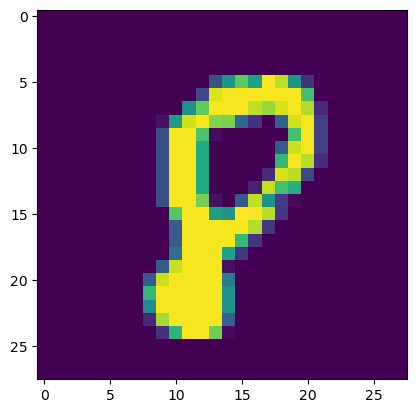

In [22]:
test_prediction(106, W1, B1, W2, B2)

In [24]:
print(f"W1 {W1}")
print(f"W2 {W2}")
print(f"B1 {B1}")
print(f"B2 {B2}")

W1 [[-0.0641569   0.31583589 -0.32438473 ...  0.44416155 -0.04815658
  -0.25658628]
 [ 0.39575551  0.1664342  -0.07304468 ...  0.01472568  0.27956229
   0.05099319]
 [-0.25389856 -0.33257875  0.12894732 ... -0.31336023 -0.07696318
   0.275204  ]
 ...
 [-0.1599644   0.0638708  -0.11745038 ... -0.07244672 -0.18537993
  -0.17364423]
 [ 0.49368938  0.36616     0.35119887 ... -0.29105925  0.21213605
  -0.30167243]
 [ 0.262749    0.30947791 -0.42091264 ...  0.49948916 -0.15634249
  -0.40603174]]
W2 [[ 0.2814944  -0.38165814  0.47288338 -0.45738966 -0.16688101 -0.32828326
  -0.6716586  -0.08906557  0.87555169 -0.07646486]
 [-0.42067908  0.46166587 -0.40685912  0.08365861  0.27978759 -0.04261327
   0.84842878 -0.84762577 -0.48708489  0.07031644]
 [ 0.13391568 -0.23912405  0.3091812   0.15851582  0.79461501  0.27089763
  -0.44928514 -0.30245521  0.03943935  0.1323655 ]
 [ 0.6672336  -0.08241174  0.14066497 -0.64640962  0.63372397 -0.17157
   0.18080613 -0.03341967 -0.24396732  0.0402697 ]
 [-0.

(784, 1)
Prediction:  [1]
Label:  1


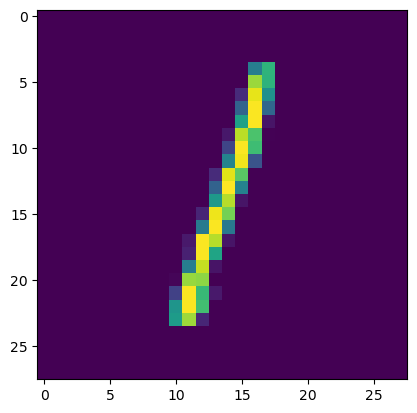

In [26]:
test_prediction(4, W1, B1, W2, B2)